In [1]:
using  Plots
pyplot();

using ForwardDiff, LinearAlgebra

In [3]:
# Line search
function bisection(f,a,b)
    l = 1e-12
    bᵢ = b
    aᵢ = a
    λ = 0
    while bᵢ - aᵢ > l
        λ = (aᵢ + bᵢ)/2
        ∇f= ForwardDiff.derivative(f,λ)
        if abs(∇f) < l # equivalent to ∇f = 0
            return λ
        elseif ∇f > 0  # left move
            aᵢ₊₁ = aᵢ
            bᵢ₊₁ = λ
        else           # move right
            aᵢ₊₁ = λ
            bᵢ₊₁ = bᵢ
        end
        aᵢ = aᵢ₊₁
        bᵢ = bᵢ₊₁
    end
        return λ
end;

function newton(f, x, N = 1000; ϵ = 1e-8, λ = 1.0, a = 0.0, b = 2.0)
    tini = time()                  # Start timer
    ∇(f, x)  = ForwardDiff.gradient(f, x)
    H(f, x) = ForwardDiff.hessian(f, x)

    for i = 1:N
        ∇fᵢ = ∇(f, x)               # Gradient
        if norm(∇fᵢ) < ϵ            # Stopping condition #1
            tend = time() - tini    # Computation time
            return x, f(x), tend, i # Return cost, time, iterations
        end
        d = -H(f, x)\∇fᵢ            # Newton direction
        ls(λ) = f(x + λ*d)          # Line search via bisection
        λ = bisection(ls,a,b)
        x = x + λ*d                 # Move to a new point
    end
    tend = time() - tini            # Computation time
    return x, f(x), tend, N         # Return x, f(x), time, iterations
end;

In [9]:
# Barrier method implementation
function barrier_method(μ, f, B, x₀, β, ϵ)
        xᵏ =  x₀
        traj = zeros(2,50)
        traj[:,1] = x₀
        k = 2
        println("\nStarting barrier method...")
        while (abs(μ*B(xᵏ)) > ϵ)
            F(x) = f(x) + μ*B(x)    # barrier problem
            xᵏ,⋅,⋅,⋅ = newton(F,xᵏ) # solver barrier prob. with Newton's
            traj[:,k] = xᵏ          # record trajectory for plotting
            println("Current point: ", round.(xᵏ, digits=5), "/ Objective : ", round(f(xᵏ), digits=5))
            μ = β*μ                # update μ
            k = k + 1
        end
        traj = traj[:,1:k-1]
        println("Barrier method converged in $k iterations.")
        return traj
end

barrier_method (generic function with 1 method)

In [28]:
# We will consider this problem
f(x) = (x[1]-2)^4 + (x[1]-2x[2])^2   # min f(x)
g(x) = x[1]^2 - x[2]                  # g(x) ≦ 0

# Penalty function
B(x) = -1/g(x)

# Initial parameters
μ = 30          # penalty term. Try different values
β = 0.4         # amount of reduction in penalty
ϵ = 1e-4        # tolerance
x₀ = [0.5,1]    # initial feasible point

traj = barrier_method(μ, f, B, x₀, β, ϵ);




Starting barrier method...
Current point: [0.63982, 1.93374]/ Objective : 13.84049
Current point: [0.69688, 1.5864]/ Objective : 9.01381
Current point: [0.75074, 1.34874]/ Objective : 6.22537
Current point: [0.79871, 1.18918]/ Objective : 4.5778
Current point: [0.83893, 1.08391]/ Objective : 3.58329
Current point: [0.8707, 1.01542]/ Objective : 2.97232
Current point: [0.8945, 0.97133]/ Objective : 2.59223
Current point: [0.91152, 0.94314]/ Objective : 2.3539
Current point: [0.92325, 0.92519]/ Objective : 2.2038
Current point: [0.93111, 0.9138]/ Objective : 2.10905
Current point: [0.93629, 0.90658]/ Objective : 2.04917
Current point: [0.93964, 0.90201]/ Objective : 2.01131
Current point: [0.9418, 0.89911]/ Objective : 1.98737
Current point: [0.94318, 0.89728]/ Objective : 1.97223
Current point: [0.94406, 0.89612]/ Objective : 1.96266
Current point: [0.94462, 0.89539]/ Objective : 1.9566
Current point: [0.94497, 0.89493]/ Objective : 1.95277
Current point: [0.9452, 0.89463]/ Objective :

In [25]:


μ = 1          # penalty term. Try different values
β = 0.6         # amount of reduction in penalty

traj2 = barrier_method(μ, f, B, x₀, β, ϵ);


Starting barrier method...
Current point: [0.8282, 1.1098]/ Objective : 3.82142
Current point: [0.84832, 1.06243]/ Objective : 3.38883
Current point: [0.8658, 1.02524]/ Objective : 3.0583
Current point: [0.88074, 0.99612]/ Objective : 2.80479
Current point: [0.89332, 0.97339]/ Objective : 2.60979
Current point: [0.90375, 0.95567]/ Objective : 2.45946
Current point: [0.91231, 0.94188]/ Objective : 2.34339
Current point: [0.91925, 0.93117]/ Objective : 2.25367
Current point: [0.92484, 0.92285]/ Objective : 2.18427
Current point: [0.92929, 0.91639]/ Objective : 2.13056
Current point: [0.93283, 0.91138]/ Objective : 2.08898
Current point: [0.93562, 0.9075]/ Objective : 2.05678
Current point: [0.93781, 0.90449]/ Objective : 2.03185
Current point: [0.93953, 0.90216]/ Objective : 2.01254
Current point: [0.94088, 0.90035]/ Objective : 1.99758
Current point: [0.94193, 0.89895]/ Objective : 1.98599
Current point: [0.94274, 0.89786]/ Objective : 1.97702
Current point: [0.94338, 0.89702]/ Objecti

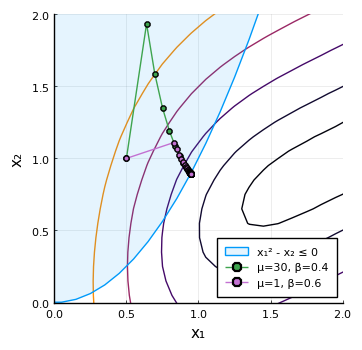

sys:1: UserWarning: The following kwargs were not used by contour: 'label'
sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [32]:
# Plotting the contours of the function optimised and the trajectory
n = 4000
x = range(-200,stop=200,length=n);
y = range(-200,stop=200,length=n);
z = [f([x[i],y[j]]) for j = 1:n, i = 1:n];

green = RGBA(0.0,0.605603,0.97868,1.0)

# Plot function contours
contour(x,y,z, # Change title accordingly
        levels = [0.25, 1, 2.5 , 5, 9],
        xaxis = ("x₁", (0,2)),
        yaxis = ("x₂", (0,2)),
        clims = (0,12),
        #clabels = true,
        legend = :bottomright,
        size = (350, 350),
        cbar = false,
        aspect_ratio = :equal)

# Plot feasible region
plot!(x, x.^2,
        fill= (10,0.1),
        color = 1,
        label = "x₁² - x₂ ≤ 0")
# annotate!(0.25, 1.75, text(,9,:left, green))

# Plot trajectory
plot!(traj[1,:], traj[2,:], marker=:o, label="μ=30, β=0.4")

savefig("ex3-barrier-1.pdf")

plot!(traj2[1,:], traj2[2,:], marker=:o, label="μ=1, β=0.6")

savefig("ex3-barrier-2.pdf")

# annotate!([(0.5, 0.9, text("x₀",9,:left,
                # RGBA(0.2422242978521988,0.6432750931576304,0.30444865153411527,1.0) ))])